In [1]:
import pandas

In [2]:
def get_signal(subject_id, run, mask):
    subject_id = '%02d' % int(subject_id)
    run = '%02d' % int(run)    
    run0 = int(run) - 1
    
    signal = np.loadtxt('/home/gdholla1/projects/bias/data/derivatives/extracted_signal/highpassed_motion/_mask_{mask}_subject_id_{subject_id}/_extracter_highpassed_motion{run0}/sub-{subject_id}_task-randomdotmotion_run-{run}_bold_unwarped_st_dtype_mcf_mask_gms_tempfilt_regfilt_maths_ts.txt'.format(**locals()))
    
    signal = (signal / signal.mean()) * 100
    signal -= signal.mean()
    
    return signal

def get_onsets(subject_id, run, design='model0', shift=0):

    df = pandas.read_pickle('/home/gdholla1/projects/bias/data/behavior/behavior.pandas')
    df = df[(df.subj_idx == subject_id) & (df.block == run)]

    df['onset_cue'] += shift
    df['onset_stim'] += shift
    
    
    if design == 'model0':
        onsets_cue = df.onset_cue.tolist()
        onsets_stim = df.onset_stim.tolist()

        conditions=['onsets_cue',
                    'onsets_stim',]
        
        onsets=[onsets_cue,
                onsets_stim]
        
    elif design == 'model1a':
        conditions=['payoff cue',
                    'neutral cue',
                    'easy',
                    'hard']
        
        onsets=[df[df.cue != 'neutral'].onset_cue.tolist(),
                df[df.cue == 'neutral'].onset_cue.tolist(),
                df[df.difficulty == 'easy'].onset_stim.tolist(),
                df[df.difficulty == 'hard'].onset_stim.tolist()]
        
    elif design == 'model1b':
        conditions= ['left', 'right', 'neutral', 'easy', 'hard']
        
        onsets=[df[df.cue == 'left'].onset_cue.tolist(),
                df[df.cue == 'right'].onset_cue.tolist(),                
                df[df.cue == 'neutral'].onset_cue.tolist(),
                df[df.difficulty == 'easy'].onset_stim.tolist(),
                df[df.difficulty == 'hard'].onset_stim.tolist()]        
        
        
    elif design == 'model1c':
        conditions=['payoff_cue',
                    'neutral_cue',
                    'easy (correct)',
                    'hard (correct)',
                    'easy (error)',
                    'hard (error)']
        
        onsets=[df[df.cue != 'neutral'].onset_cue.tolist(),
                df[df.cue == 'neutral'].onset_cue.tolist(),
                df[(df.difficulty == 'easy') & (df.correct == 1)].onset_stim.tolist(),
                df[(df.difficulty == 'hard') & (df.correct == 1)].onset_stim.tolist(),
                df[(df.difficulty == 'easy') & (df.correct == 0)].onset_stim.tolist(),
                df[(df.difficulty == 'hard') & (df.correct == 0)].onset_stim.tolist()]        
        
    elif design == 'model1d':
        conditions=['payoff_cue',
                    'neutral_cue',
                    'easy',
                    'hard',
                    'correct',
                    'error']
        
        onsets=[df[df.cue != 'neutral'].onset_cue.tolist(),
                df[df.cue == 'neutral'].onset_cue.tolist(),
                df[(df.difficulty == 'easy')].onset_stim.tolist(),
                df[(df.difficulty == 'hard')].onset_stim.tolist(),
                df[(df.correct == 1)].onset_stim.tolist(),
                df[(df.correct == 0)].onset_stim.tolist()]
        
    
    elif design == 'model2':
        conditions=['payoff_cue',
                    'neutral_cue',
                    'correct (congruent)',
                    'correct (neutral)',
                    'correct (incongruent)',
                    'error (congruent)',
                    'error (neutral)',
                    'error (incongruent)']   
        
        onsets=[df[df.cue != 'neutral'].onset_cue.tolist(),
                df[df.cue == 'neutral'].onset_cue.tolist(),
                df[(df.cue_validity == 'valid') & (df.correct == 1)].onset_stim.tolist(),
                df[(df.cue_validity == 'neutral') & (df.correct == 1)].onset_stim.tolist(),
                df[(df.cue_validity == 'invalid') & (df.correct == 1)].onset_stim.tolist(),
                df[(df.cue_validity == 'valid') & (df.correct == 0)].onset_stim.tolist(),
                df[(df.cue_validity == 'neutral') & (df.correct == 0)].onset_stim.tolist(),
                df[(df.cue_validity == 'invalid') & (df.correct == 0)].onset_stim.tolist()]
        
        
    elif design == 'model3':
        conditions=['payoff_cue',
                    'neutral_cue',                    
                    'left response',
                    'right response']
        
        onsets=[df[df.cue != 'neutral'].onset_cue.tolist(),
                df[df.cue == 'neutral'].onset_cue.tolist(),
                df[df.response == 1].onset_stim.tolist(),
                df[df.response == 2].onset_stim.tolist()]        
        
        
    elif design == 'model4':
        
        onsets_neutral_cue_correct = df[(df.cue_validity == 'neutral') & (df.correct == 1)].onset_stim.tolist()
        onsets_neutral_cue_error = df[(df.cue_validity == 'neutral') & (df.correct == 0)].onset_stim.tolist()
        
        onsets_valid_cue_correct = df[(df.cue_validity == 'valid') & (df.correct == 1)].onset_stim.tolist()
        onsets_valid_cue_error = df[(df.cue_validity == 'valid') & (df.correct == 0)].onset_stim.tolist()        
        
        onsets_invalid_cue_correct = df[(df.cue_validity == 'invalid') & (df.correct == 1)].onset_stim.tolist()
        onsets_invalid_cue_error = df[(df.cue_validity == 'invalid') & (df.correct == 0)].onset_stim.tolist()                

        
        conditions=['payoff_cue',
                    'neutral_cue',
                    'valid (correct)',
                    'valid (error)',
                    'neutral (correct)',
                    'neutral (error)',
                    'invalid (correct)',
                    'invalid (error)']
        
        onsets=[df[df.cue != 'neutral'].onset_cue.tolist(),
                df[df.cue == 'neutral'].onset_cue.tolist(),
                onsets_valid_cue_correct,
                onsets_valid_cue_error,
                onsets_neutral_cue_correct,
                onsets_neutral_cue_error,
                onsets_invalid_cue_correct,
                onsets_invalid_cue_error]                
    
    return dict(zip(conditions, onsets))

In [3]:
%load_ext rpy2.ipython


# Model 1a

In [4]:
import itertools
import pyfir
from nipy.modalities.fmri import design_matrix, experimental_paradigm
import statsmodels.api as sm

level2_dict = []
adj_r = []
# pars = ['neutral_cue', 'left_cue', 'right_cue', 'neutral_easy_correct', 'valid_easy_correct', 'invalid_easy_correct', 'neutral_hard_correct', 'valid_hard_correct', 'invalid_hard_correct', 'easy_error', 'hard_error',]
# pars = 

for subject_id in np.arange(1, 20):
    for run in [1,2,3]:

        try:
            onsets_dict = get_onsets(subject_id, run, 'model1a', shift=-1.5)
            pars = onsets_dict.keys()

            conditions = []
            onsets = []
            for key in onsets_dict.keys():
                conditions += [key] * len(onsets_dict[key])
                onsets += onsets_dict[key]

            paradigm =  experimental_paradigm.BlockParadigm(con_id=conditions, 
                                                            onset=onsets,
                                                            duration=[[1.]] * len(conditions))
            tr = 3.0
            frametimes = np.linspace(0, 387 * tr, 387)
            hrf_model = 'Canonical with Derivative'

            X, names= design_matrix.dmtx_light(frametimes, paradigm, hrf_model=hrf_model, drift_model='polynomial', fir_delays=np.arange(11), drift_order=3)

            X /= X.max(0)
            X = pandas.DataFrame(X, columns=names)

            for i, mask in enumerate(['STh_L', 'STh_R']):
                signal = get_signal(subject_id,  run, mask)
                r = sm.GLSAR(signal, X).iterative_fit()

                adj_r.append({'subject_id':subject_id, 'mask':mask, 'r2_adj':r.rsquared_adj, 'r2':r.rsquared, 'run':run})

                for par in pars:
                    level2_dict.append({'value':r.params[par],
                                        'par':par,
                                        'subject_id':subject_id,
                                        'mask':mask,
                                        'run':run})
        except Exception as e:
            print 'Error: %s/%s/%s' %  (subject_id, mask, e)

/usr/local/lib/python2.7/dist-packages/nipy/modalities/fmri/design_matrix.py:191: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if rmatrix == None:


Error: 6/STh_R/all the input arrays must have same number of dimensions


The first set of analyses tested whether there were significant differences in the BOLD response between task conditions. Therefore, a set of general linear models (GLM) were fit to the extracted STN segment time series. The first model (GLM1a) contained the following task condition regressors: (a) neutral cue, (b) payoff cue, (c) easy RDM stimulus, (d) hard RDM stimulus. Its first main contrast of interest was ‘payoff cue > neutral cue’ (and neutral cue > payoff cue), to see whether any segments were involved in processing the cue information. The other main contrast was ‘hard RDM stimulus > easy RDM stimulus’ (and ‘easy RDM stimulus > hard RDM stimulus’), which should indicate areas that were related to the speed of evidence accumulation. 


/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:3367: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)


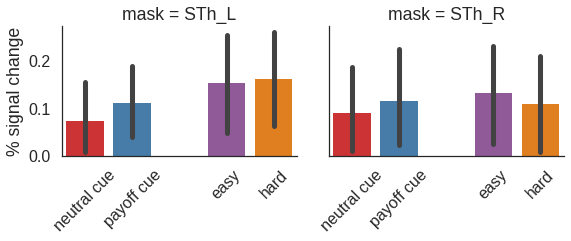

In [5]:
df_glm = pandas.DataFrame(level2_dict)
df_glm = df_glm.query('par != "constant"')
df_glm['dummy'] = 1

df_glm['% signal change'] = df_glm['value']
sns.set_palette('Set1')
sns.set_context('poster')
sns.set_style('white')

# sns.factorplot(x='dummy', y='value', hue='par', data=df_glm, col='mask', col_wrap=3, kind='bar', ci=95, hue_order=['payoff_cue (left)', 'payoff_cue (right)', 'neutral_cue','difficult_rdm', 'easy_rdm'])

tmp = df_glm.groupby(['subject_id', 'mask', 'par', 'dummy'], as_index=False).mean()
fac = sns.factorplot(x='par', y='% signal change', data=tmp, col='mask', col_wrap=3, kind='bar', ci=95, x_order=['neutral cue', 'payoff cue', '', 'easy', 'hard',])

fac.set_xticklabels(rotation=45)

plt.tight_layout()

fac.set_xlabels('')

### Payoff cue > neutral cue

In [6]:
masks = ['STh_L', 'STh_R']

results = []

for mask in masks:
    df_mask = df_glm[df_glm['mask'] == mask].pivot_table(index='subject_id', values='value', columns='par')
    
    
    print '***** %s ******' % mask
    %R -i df_mask
    %R library(BayesFactor)
    %R bf = ttestBF(df_mask$payoff.cue - df_mask$neutral.cue)
    %R tmp = extractBF(bf)
    %R -o tmp
    
    t, p = sp.stats.ttest_rel(df_mask['payoff cue'], df_mask['neutral cue'])
    
    results.append({'mask':mask,
                    'BF':tmp.bf.values[0],
                    't':t,
                    'p':p})
    
np.round(pandas.DataFrame(results)[['mask', 'BF', 't', 'p']], 2).T

***** STh_L ******
***** STh_R ******


/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: coda

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: Matrix

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: ************
Welcome to BayesFactor 0.9.11-1. If you have questions, please contact Richard Morey (richarddmorey@gmail.com).

Type BFManual() to open the manual.
************

  warnings.warn(x, RRuntimeWarning)


,0,1
mask,STh_L,STh_R
BF,0.54,0.32
t,1.38,0.81
p,0.19,0.43


In [7]:
tmp = df_glm.pivot_table(index='subject_id', values='value', columns=['par', 'mask'])
tmp = tmp['payoff cue'] - tmp['neutral cue']
tmp = pandas.melt(tmp.reset_index(), id_vars=['subject_id'])

# Difficulty > Easy

In [9]:
masks = ['STh_L', 'STh_R']

results = []

for mask in masks:
    df_mask = df_glm[df_glm['mask'] == mask].pivot_table(index='subject_id', values='value', columns='par')
    
    
    print '***** %s ******' % mask
    %R -i df_mask
    %R library(BayesFactor)
    %R bf = ttestBF(df_mask$easy - df_mask$hard)
    %R tmp = extractBF(bf)
    %R -o tmp
    
    t, p = sp.stats.ttest_rel(df_mask['easy'], df_mask['hard'])
    
    results.append({'mask':mask,
                    'BF':tmp.bf.values[0],
                     't':t,
                    'p':p})
    
np.round(pandas.DataFrame(results)[['mask', 'BF', 'p']], 2).T

***** STh_L ******
***** STh_R ******


,0,1
mask,STh_L,STh_R
BF,0.25,0.42
p,0.74,0.26


# Model 1b

In [11]:
import itertools
import pyfir
from nipy.modalities.fmri import design_matrix, experimental_paradigm
import statsmodels.api as sm

level2_dict = []
adj_r = []
# pars = ['neutral_cue', 'left_cue', 'right_cue', 'neutral_easy_correct', 'valid_easy_correct', 'invalid_easy_correct', 'neutral_hard_correct', 'valid_hard_correct', 'invalid_hard_correct', 'easy_error', 'hard_error',]
# pars = 

for subject_id in np.arange(1, 20):
    for run in [1,2,3]:

        try:
            onsets_dict = get_onsets(subject_id, run, 'model1b', shift=-1.5)
            pars = onsets_dict.keys()

            conditions = []
            onsets = []
            for key in onsets_dict.keys():
                conditions += [key] * len(onsets_dict[key])
                onsets += onsets_dict[key]

            paradigm =  experimental_paradigm.BlockParadigm(con_id=conditions, 
                                                            onset=onsets,
                                                            duration=[[1.]] * len(conditions))
            tr = 3.0
            frametimes = np.linspace(0, 387 * tr, 387)
            hrf_model = 'Canonical with Derivative'

            X, names= design_matrix.dmtx_light(frametimes, paradigm, hrf_model=hrf_model, drift_model='polynomial', fir_delays=np.arange(11), drift_order=3)

            X /= X.max(0)
            X = pandas.DataFrame(X, columns=names)

            for i, mask in enumerate(['STh_L', 'STh_R']):
                signal = get_signal(subject_id,  run, mask)
                r = sm.GLSAR(signal, X).iterative_fit()

                adj_r.append({'subject_id':subject_id, 'mask':mask, 'r2_adj':r.rsquared_adj, 'r2':r.rsquared, 'run':run})

                for par in pars:
                    level2_dict.append({'value':r.params[par],
                                        'par':par,
                                        'subject_id':subject_id,
                                        'mask':mask,
                                        'run':run})
        except Exception as e:
            print 'Error: %s/%s/%s' %  (subject_id, mask, e)

Error: 6/STh_R/all the input arrays must have same number of dimensions


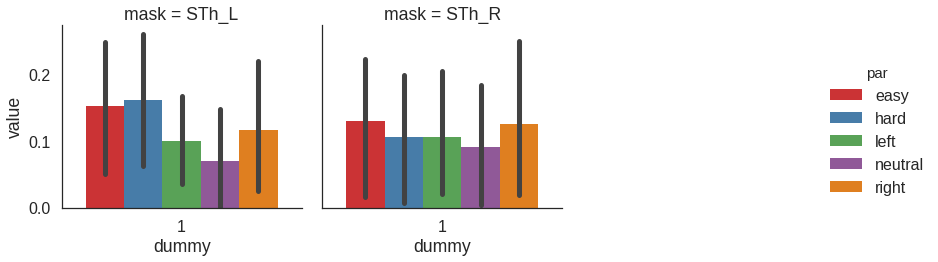

In [12]:
df_glm = pandas.DataFrame(level2_dict)
df_glm = df_glm.query('par != "constant"')
df_glm['dummy'] = 1

df_glm['% signal change'] = df_glm['value']
sns.set_palette('Set1')
sns.set_context('poster')
sns.set_style('white')

# sns.factorplot(x='dummy', y='value', hue='par', data=df_glm, col='mask', col_wrap=3, kind='bar', ci=95, hue_order=['payoff_cue (left)', 'payoff_cue (right)', 'neutral_cue','difficult_rdm', 'easy_rdm'])

tmp = df_glm.groupby(['subject_id', 'mask', 'par', 'dummy'], as_index=False).mean()
sns.factorplot(x='dummy', y='value', hue='par', data=tmp, col='mask', col_wrap=3, kind='bar', ci=95)

In [13]:
results = []

for mask in masks:
    df_mask = df_glm[df_glm['mask'] == mask].pivot_table(index='subject_id', values='value', columns='par')
    
    
    print '***** %s ******' % mask
    %R -i df_mask
    %R library(BayesFactor)
    %R bf = ttestBF(df_mask$left - df_mask$right)
    %R tmp = extractBF(bf)
    %R -o tmp
    
    t, p = sp.stats.ttest_rel(df_mask['left'], df_mask['right'])
    
    results.append({'mask':mask,
                    'BF':tmp.bf.values[0],
                     't':t,
                    'p':p})
    
np.round(pandas.DataFrame(results)[['mask', 'BF', 'p']], 2).T

***** STh_L ******
***** STh_R ******


,0,1
mask,STh_L,STh_R
BF,0.27,0.28
p,0.61,0.55


# Model 1c


It is well-known that especially limbic structures show highly heightened activity after an error has been made {Alexander:2011js}. Therefore, “drift-rate”-related activity in limbic areas such as the Insula {Mulder:2014ho, Keuken:2014iz} might just be a result of a larger number of errors in trials with a lower drift rate. To test this hypothesis, we fitted a third variant of the GLM (GLM 1c), that deconfounded the task difficulty from error trials. It included the following regressors: (a) neutral cue, (b) payoff cue, (d) easy RDM stimulus (correct), (e) easy RDM stimulus (error), (f) hard RDM stimulus (correct), (g) hard RDM stimulus (error). The main contrast-of-interest for this GLM was ‘hard RDM stimulus (correct) > easy RDM stimulus (correct)’.


In [14]:
import itertools
import pyfir
from nipy.modalities.fmri import design_matrix, experimental_paradigm
import statsmodels.api as sm

level2_dict = []
adj_r = []
# pars = ['neutral_cue', 'left_cue', 'right_cue', 'neutral_easy_correct', 'valid_easy_correct', 'invalid_easy_correct', 'neutral_hard_correct', 'valid_hard_correct', 'invalid_hard_correct', 'easy_error', 'hard_error',]
# pars = 

for subject_id in np.arange(1, 20):
    for run in [1,2,3]:

        try:
            onsets_dict = get_onsets(subject_id, run, 'model1c', shift=-1.5)
            pars = onsets_dict.keys()

            conditions = []
            onsets = []
            for key in onsets_dict.keys():
                conditions += [key] * len(onsets_dict[key])
                onsets += onsets_dict[key]

            paradigm =  experimental_paradigm.BlockParadigm(con_id=conditions, 
                                                            onset=onsets,
                                                            duration=[[1.]] * len(conditions))
            tr = 3.0
            frametimes = np.linspace(0, 387 * tr, 387)
            hrf_model = 'Canonical with Derivative'

            X, names= design_matrix.dmtx_light(frametimes, paradigm, hrf_model=hrf_model, drift_model='polynomial', fir_delays=np.arange(11), drift_order=3)

            X /= X.max(0)
            X = pandas.DataFrame(X, columns=names)

            for i, mask in enumerate(masks):
                signal = get_signal(subject_id,  run, mask)
                r = sm.GLSAR(signal, X).iterative_fit()

                adj_r.append({'subject_id':subject_id, 'mask':mask, 'r2_adj':r.rsquared_adj, 'r2':r.rsquared, 'run':run})

                for par in pars:
                    level2_dict.append({'value':r.params[par],
                                        'par':par,
                                        'subject_id':subject_id,
                                        'mask':mask,
                                        'run':run})
        except Exception as e:
            print 'Error: %s/%s/%s' %  (subject_id, mask, e)

Error: 6/STh_R/all the input arrays must have same number of dimensions


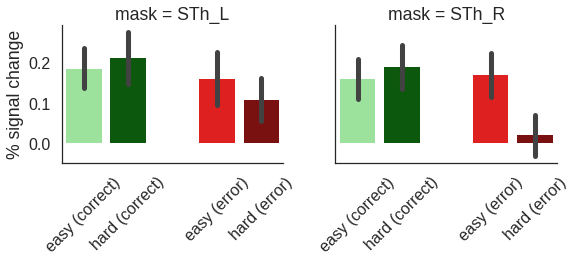

In [15]:
df_glm = pandas.DataFrame(level2_dict)
df_glm = df_glm.query('par != "constant"')
df_glm['dummy'] = 1

df_glm['% signal change'] = df_glm['value']
sns.set_palette('Set1')
sns.set_context('poster')
sns.set_style('white')

# sns.factorplot(x='dummy', y='value', hue='par', data=df_glm, col='mask', col_wrap=3, kind='bar', ci=95, hue_order=['payoff_cue (left)', 'payoff_cue (right)', 'neutral_cue','difficult_rdm', 'easy_rdm'])

tmp = df_glm.groupby(['subject_id', 'mask', 'par', 'dummy'], as_index=False).mean()
fac = sns.factorplot(x='par', y='% signal change', data=tmp, col='mask', col_wrap=3, kind='bar', ci=67, x_order=['easy (correct)', 'hard (correct)', '', 'easy (error)', 'hard (error)'], palette=['lightgreen', 'darkgreen', 'red', 'red', 'darkred'])

fac.set_xticklabels(rotation=45)
fac.set_xlabels('')

plt.tight_layout()

In [16]:
import re

In [17]:
results = []

for mask in masks:
    df = df_glm[df_glm['mask'] == mask].pivot_table(index='subject_id', values='value', columns='par')
    
    df = pandas.melt(df.reset_index(), id_vars='subject_id')
    reg = re.compile('([a-z]+) \(([a-z]+)\)')

    df = df[df.par.apply(lambda x: reg.match(x) is not None)]
    df['difficulty'] = df.par.apply(lambda x: reg.match(x).group(1))
    df['correct'] = df.par.apply(lambda x: reg.match(x).group(2))
    df['subject_id'] = df['subject_id'].astype('category')
    
    
    print ' ****** %s *******' % mask
    %R -i df

    %R library(BayesFactor)
    %R bf = anovaBF(value ~ difficulty*correct + subject_id, data = df,  whichRandom="subject_id", whichModels='top', iterations=100000)
    %R print(bf)
    %R print(1/bf)
    %R print(summary(aov(value ~ difficulty*correct + Error(subject_id/(difficulty*correct)), df)))
    
#     %R tmp = extractBF(bf)
#     %R -o tmp
    
#     results.append({'mask':mask,
#                     'BF':tmp.bf.values[0]})
    
# pandas.DataFrame(results)[['mask', 'BF']]

 ****** STh_L *******


/usr/local/lib/python2.7/dist-packages/rpy2/robjects/pandas2ri.py:57: UserWarning: Error while trying to convert the column "subject_id". Fall back to string conversion. The error is: Converting pandas "Category" series to R factor is only possible when categories are strings.
  (name, str(e)))


  |======================================================================| 100%


Bayes factor top-down analysis
--------------
When effect is omitted from difficulty + correct + difficulty:correct + subject_id , BF is...
[1] Omit correct:difficulty : 2.290569 ±2.32%
[2] Omit correct            : 1.559496 ±3.33%
[3] Omit difficulty         : 4.049439 ±2.84%

Against denominator:
  value ~ difficulty + correct + difficulty:correct + subject_id 
---
Bayes factor type: BFlinearModel, JZS



                                                        denominator
numerator                                                difficulty + correct + subject_id
  difficulty + correct + difficulty:correct + subject_id                         0.4365728
                                                        denominator
numerator                                                difficulty + difficulty:correct + subject_id
  difficulty + correct + difficulty:correct + subject_id                                    0.6412327
                                                        denominator
numerator                                                correct + difficulty:correct + subject_id
  difficulty + correct + difficulty:correct + subject_id                                 0.2469478



Error: subject_id
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 18   3.24    0.18               

Error: subject_id:difficulty
           Df  Sum Sq  Mean Sq F value Pr(>F)
difficulty  1 0.00311 0.003108   0.183  0.674
Residuals  18 0.30585 0.016992               

Error: subject_id:correct
          Df Sum Sq Mean Sq F value Pr(>F)
correct    1  0.081 0.08105   1.078  0.313
Residuals 18  1.354 0.07521               

Error: subject_id:difficulty:correct
                   Df Sum Sq Mean Sq F value Pr(>F)
difficulty:correct  1 0.0299 0.02990   1.936  0.181
Residuals          18 0.2781 0.01545               


 ****** STh_R *******


  |======================================================================| 100%


Bayes factor top-down analysis
--------------
When effect is omitted from difficulty + correct + difficulty:correct + subject_id , BF is...
[1] Omit correct:difficulty : 0.6272753 ±1.69%
[2] Omit correct            : 1.008385  ±1.14%
[3] Omit difficulty         : 1.893889  ±1.53%

Against denominator:
  value ~ difficulty + correct + difficulty:correct + subject_id 
---
Bayes factor type: BFlinearModel, JZS



                                                        denominator
numerator                                                difficulty + correct + subject_id
  difficulty + correct + difficulty:correct + subject_id                          1.594196
                                                        denominator
numerator                                                difficulty + difficulty:correct + subject_id
  difficulty + correct + difficulty:correct + subject_id                                    0.9916844
                                                        denominator
numerator                                                correct + difficulty:correct + subject_id
  difficulty + correct + difficulty:correct + subject_id                                 0.5280141



Error: subject_id
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 18  2.433  0.1351               

Error: subject_id:difficulty
           Df Sum Sq Mean Sq F value Pr(>F)  
difficulty  1 0.0669 0.06688   3.197 0.0906 .
Residuals  18 0.3765 0.02092                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: subject_id:correct
          Df Sum Sq Mean Sq F value Pr(>F)
correct    1 0.1203 0.12029   1.874  0.188
Residuals 18 1.1552 0.06418               

Error: subject_id:difficulty:correct
                   Df Sum Sq Mean Sq F value Pr(>F)  
difficulty:correct  1  0.147 0.14702   6.751 0.0182 *
Residuals          18  0.392 0.02178                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


## Model 2

In [18]:


import itertools
import pyfir
from nipy.modalities.fmri import design_matrix, experimental_paradigm
import statsmodels.api as sm

level2_dict = []
adj_r = []
# pars = ['neutral_cue', 'left_cue', 'right_cue', 'neutral_easy_correct', 'valid_easy_correct', 'invalid_easy_correct', 'neutral_hard_correct', 'valid_hard_correct', 'invalid_hard_correct', 'easy_error', 'hard_error',]
# pars = 

for subject_id in np.arange(1, 20):
    for run in [1,2,3]:

        try:
            onsets_dict = get_onsets(subject_id, run, 'model2', shift=-1.5)
            pars = onsets_dict.keys()

            conditions = []
            onsets = []
            for key in onsets_dict.keys():
                conditions += [key] * len(onsets_dict[key])
                onsets += onsets_dict[key]

            paradigm =  experimental_paradigm.BlockParadigm(con_id=conditions, 
                                                            onset=onsets,
                                                            duration=[[1.]] * len(conditions))
            tr = 3.0
            frametimes = np.linspace(0, 387 * tr, 387)
            hrf_model = 'Canonical with Derivative'

            X, names= design_matrix.dmtx_light(frametimes, paradigm, hrf_model=hrf_model, drift_model='polynomial', fir_delays=np.arange(11), drift_order=3)

            X /= X.max(0)
            X = pandas.DataFrame(X, columns=names)

            for i, mask in enumerate(masks):
                signal = get_signal(subject_id,  run, mask)
                r = sm.GLSAR(signal, X).iterative_fit()

                adj_r.append({'subject_id':subject_id, 'mask':mask, 'r2_adj':r.rsquared_adj, 'r2':r.rsquared, 'run':run})

                for par in pars:
                    level2_dict.append({'value':r.params[par],
                                        'par':par,
                                        'subject_id':subject_id,
                                        'mask':mask,
                                        'run':run})
        except Exception as e:
            print 'Error: %s/%s/%s' %  (subject_id, mask, e)

Error: 6/STh_R/all the input arrays must have same number of dimensions
Error: 15/STh_L/'error (incongruent)'


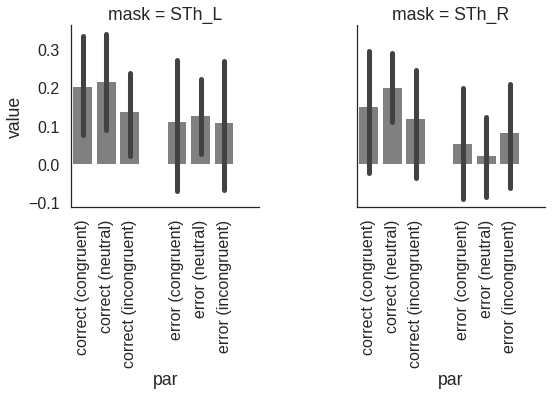

In [19]:
df_glm = pandas.DataFrame(level2_dict)
df_glm = df_glm.query('par != "constant"')
df_glm['dummy'] = 1

df_glm['% signal change'] = df_glm['value']
sns.set_palette('Set1')
sns.set_context('poster')
sns.set_style('white')

# sns.factorplot(x='dummy', y='value', hue='par', data=df_glm, col='mask', col_wrap=3, kind='bar', ci=95, hue_order=['payoff_cue (left)', 'payoff_cue (right)', 'neutral_cue','difficult_rdm', 'easy_rdm'])

tmp = df_glm.groupby(['subject_id', 'mask', 'par', 'dummy'], as_index=False).mean()
# sns.factorplot(x='dummy', y='value', hue='par', data=tmp, col='mask', col_wrap=3, kind='bar', ci=95, hue_order=['correct (congruent)', 'correct (neutral)', 'correct (incongruent)', '', 'error (congruent)', 'error (neutral)', 'error (incongruent)', ''])
fac = sns.factorplot(x='par', y='value', data=tmp, col='mask', col_wrap=3, kind='bar', ci=95, x_order=['correct (congruent)', 'correct (neutral)', 'correct (incongruent)', '', 'error (congruent)', 'error (neutral)', 'error (incongruent)', ''], palette=['gray'])
fac.set_xticklabels(rotation=90)



In [20]:
results = []

for mask in masks:
    df = df_glm[df_glm['mask'] == mask].pivot_table(index='subject_id', values='value', columns='par')
    
    df = pandas.melt(df.reset_index(), id_vars='subject_id')
    reg = re.compile('([a-z]+) \(([a-z]+)\)')

    df = df[df.par.apply(lambda x: reg.match(x) is not None)]
    df['correct'] = df.par.apply(lambda x: reg.match(x).group(1))
    df['congruency'] = df.par.apply(lambda x: reg.match(x).group(2))
    df['subject_id'] = df['subject_id'].astype('category')

    %R -i df

    %R library(BayesFactor)
    %R bf = anovaBF(value ~ congruency*correct + subject_id, data = df,  whichRandom="subject_id", whichModels='top')
    %R print(bf)
    %R print(1/bf)
    %R print(summary(aov(value ~ congruency * correct + Error(subject_id/(congruency * correct)), df)))
    %R tmp = extractBF(bf)
    %R -o tmp
    
#     results.append({'mask':mask,
#                     'BF':tmp.bf.values[0]})
    
# pandas.DataFrame(results)[['mask', 'BF']]

  |======================================================================| 100%


Bayes factor top-down analysis
--------------
When effect is omitted from correct + congruency + correct:congruency + subject_id , BF is...
[1] Omit congruency:correct : 6.17409  ±2.33%
[2] Omit congruency         : 8.697574 ±2.21%
[3] Omit correct            : 1.901809 ±2.47%

Against denominator:
  value ~ correct + congruency + correct:congruency + subject_id 
---
Bayes factor type: BFlinearModel, JZS



                                                        denominator
numerator                                                correct + congruency + subject_id
  correct + congruency + correct:congruency + subject_id                         0.1619672
                                                        denominator
numerator                                                correct + correct:congruency + subject_id
  correct + congruency + correct:congruency + subject_id                                 0.1149746
                                                        denominator
numerator                                                congruency + correct:congruency + subject_id
  correct + congruency + correct:congruency + subject_id                                    0.5258151



Error: subject_id
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 18  5.075  0.2819               

Error: subject_id:congruency
           Df Sum Sq Mean Sq F value Pr(>F)
congruency  2 0.0488 0.02438   0.328  0.722
Residuals  36 2.6736 0.07427               

Error: subject_id:correct
          Df Sum Sq Mean Sq F value Pr(>F)
correct    1 0.1356  0.1356   1.346  0.261
Residuals 18 1.8132  0.1007               

Error: subject_id:congruency:correct
                   Df Sum Sq Mean Sq F value Pr(>F)
congruency:correct  2 0.0244 0.01220   0.341  0.713
Residuals          36 1.2866 0.03574               


  |======================================================================| 100%


Bayes factor top-down analysis
--------------
When effect is omitted from correct + congruency + correct:congruency + subject_id , BF is...
[1] Omit congruency:correct : 3.008755  ±2.8%
[2] Omit congruency         : 11.53935  ±3.28%
[3] Omit correct            : 0.2036176 ±3.87%

Against denominator:
  value ~ correct + congruency + correct:congruency + subject_id 
---
Bayes factor type: BFlinearModel, JZS



                                                        denominator
numerator                                                correct + congruency + subject_id
  correct + congruency + correct:congruency + subject_id                         0.3323634
                                                        denominator
numerator                                                correct + correct:congruency + subject_id
  correct + congruency + correct:congruency + subject_id                                0.08665998
                                                        denominator
numerator                                                congruency + correct:congruency + subject_id
  correct + congruency + correct:congruency + subject_id                                     4.911167



Error: subject_id
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 18  6.387  0.3548               

Error: subject_id:congruency
           Df Sum Sq Mean Sq F value Pr(>F)
congruency  2 0.0028 0.00141   0.024  0.976
Residuals  36 2.0965 0.05824               

Error: subject_id:correct
          Df Sum Sq Mean Sq F value Pr(>F)  
correct    1 0.3049 0.30489   5.353 0.0327 *
Residuals 18 1.0252 0.05696                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: subject_id:congruency:correct
                   Df Sum Sq Mean Sq F value Pr(>F)
congruency:correct  2 0.0949 0.04743   2.244  0.121
Residuals          36 0.7608 0.02113               


# Model 3

In [21]:
import itertools
import pyfir
from nipy.modalities.fmri import design_matrix, experimental_paradigm
import statsmodels.api as sm

level2_dict = []
adj_r = []
# pars = ['neutral_cue', 'left_cue', 'right_cue', 'neutral_easy_correct', 'valid_easy_correct', 'invalid_easy_correct', 'neutral_hard_correct', 'valid_hard_correct', 'invalid_hard_correct', 'easy_error', 'hard_error',]
# pars = 

for subject_id in np.arange(1, 20):
    for run in [1,2,3]:

        try:
            onsets_dict = get_onsets(subject_id, run, 'model3', shift=-1.5)
            pars = onsets_dict.keys()

            conditions = []
            onsets = []
            for key in onsets_dict.keys():
                conditions += [key] * len(onsets_dict[key])
                onsets += onsets_dict[key]

            paradigm =  experimental_paradigm.BlockParadigm(con_id=conditions, 
                                                            onset=onsets,
                                                            duration=[[1.]] * len(conditions))
            tr = 3.0
            frametimes = np.linspace(0, 387 * tr, 387)
            hrf_model = 'Canonical with Derivative'

            X, names= design_matrix.dmtx_light(frametimes, paradigm, hrf_model=hrf_model, drift_model='polynomial', fir_delays=np.arange(11), drift_order=3)

            X /= X.max(0)
            X = pandas.DataFrame(X, columns=names)

            for i, mask in enumerate(masks):
                signal = get_signal(subject_id,  run, mask)
                r = sm.GLSAR(signal, X).iterative_fit()

                adj_r.append({'subject_id':subject_id, 'mask':mask, 'r2_adj':r.rsquared_adj, 'r2':r.rsquared, 'run':run})

                for par in pars:
                    level2_dict.append({'value':r.params[par],
                                        'par':par,
                                        'subject_id':subject_id,
                                        'mask':mask,
                                        'run':run})
        except Exception as e:
            print 'Error: %s/%s/%s' %  (subject_id, mask, e)

Error: 6/STh_R/all the input arrays must have same number of dimensions


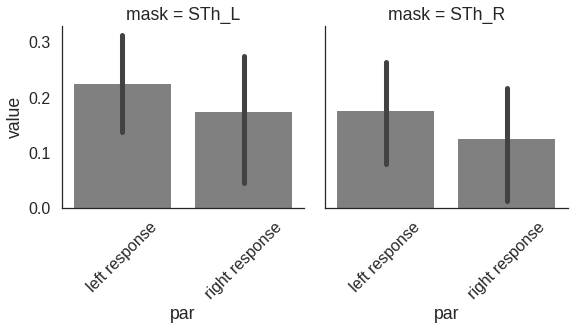

In [22]:
df_glm = pandas.DataFrame(level2_dict)
df_glm = df_glm.query('par != "constant"')
df_glm['dummy'] = 1

df_glm['% signal change'] = df_glm['value']
sns.set_palette('Set1')
sns.set_context('poster')
sns.set_style('white')

# sns.factorplot(x='dummy', y='value', hue='par', data=df_glm, col='mask', col_wrap=3, kind='bar', ci=95, hue_order=['payoff_cue (left)', 'payoff_cue (right)', 'neutral_cue','difficult_rdm', 'easy_rdm'])

tmp = df_glm.groupby(['subject_id', 'mask', 'par', 'dummy'], as_index=False).mean()
# sns.factorplot(x='dummy', y='value', hue='par', data=tmp, col='mask', col_wrap=3, kind='bar', ci=95, hue_order=['correct (congruent)', 'correct (neutral)', 'correct (incongruent)', '', 'error (congruent)', 'error (neutral)', 'error (incongruent)', ''])
fac = sns.factorplot(x='par', y='value', data=tmp, col='mask', col_wrap=3, kind='bar', ci=95, x_order=['left response', 'right response'], palette=['gray'])
fac.set_xticklabels(rotation=45)



In [23]:
results = []

for mask in masks:
    df = df_glm[df_glm['mask'] == mask].pivot_table(index='subject_id', values='value', columns='par')
    
    df = pandas.melt(df.reset_index(), id_vars='subject_id')

    df = df[df.par.apply(lambda x: x.split(' ')[-1] == 'response')]
    
    df_mask = df.pivot_table(index='subject_id', columns='par', values='value')

    %R -i df_mask
    %R library(BayesFactor)
    %R bf = ttestBF(df_mask$left.response - df_mask$right.response)
    %R tmp = extractBF(bf)
    %R -o tmp
    
    t, p = sp.stats.ttest_rel(df_mask['left response'], df_mask['right response'])
    
    results.append({'mask':mask,
                    'BF':tmp.bf.values[0],
                    't':t,
                    'p':p})
    
np.round(pandas.DataFrame(results)[['mask', 'BF', 't', 'p']], 2).T    
    

,0,1
mask,STh_L,STh_R
BF,0.5,0.63
t,1.32,1.52
p,0.2,0.15


# Model 0

In [10]:
import itertools
import pyfir
from nipy.modalities.fmri import design_matrix, experimental_paradigm
import statsmodels.api as sm

level2_dict = []
adj_r = []
# pars = ['neutral_cue', 'left_cue', 'right_cue', 'neutral_easy_correct', 'valid_easy_correct', 'invalid_easy_correct', 'neutral_hard_correct', 'valid_hard_correct', 'invalid_hard_correct', 'easy_error', 'hard_error',]
# pars = 

for subject_id in np.arange(1, 20):
    print subject_id
    for run in [1,2,3]:
#         for shift in [-3.0, -1.5, 0.0, 1.5, 3.0]:

        try:
            onsets_dict = get_onsets(subject_id, run, 'model0', shift=-1.5)
            pars = onsets_dict.keys()

            conditions = []
            onsets = []
            for key in onsets_dict.keys():
                conditions += [key] * len(onsets_dict[key])
                onsets += onsets_dict[key]

            paradigm =  experimental_paradigm.BlockParadigm(con_id=conditions, 
                                                            onset=onsets,
                                                            duration=[[1.]] * len(conditions))
            tr = 3.0
            frametimes = np.linspace(0, 387 * tr, 387)
#                 hrf_model = 'Canonical with Derivative'

            X, names= design_matrix.dmtx_light(frametimes, paradigm, hrf_model=hrf_model, drift_model='polynomial', fir_delays=np.arange(11), drift_order=3)

            X /= X.max(0)
            X = pandas.DataFrame(X, columns=names)

            for i, mask in enumerate(['STh_L_A', 'STh_L_B', 'STh_L_C', 'STh_R_A', 'STh_R_B', 'STh_R_C']):
                signal = get_signal(subject_id,  run, mask)
                r = sm.GLSAR(signal, X).iterative_fit()

                adj_r.append({'subject_id':subject_id, 'mask':mask, 'r2_adj':r.rsquared_adj, 'r2':r.rsquared, 'run':run})

                for par in pars:
                    level2_dict.append({'value':r.params[par],
                                        'par':par,
                                        'p':r.pvalues[par],
                                        'subject_id':subject_id,
                                        'mask':mask,
                                        'run':run,})
        except Exception as e:
            print 'Error: %s/%s/%s' %  (subject_id, mask, e)

1
2
3
4
5
6
Error: 6/STh_R_C/all the input arrays must have same number of dimensions
7
8
9
10
11
12
13
14
15
16
17
18
19


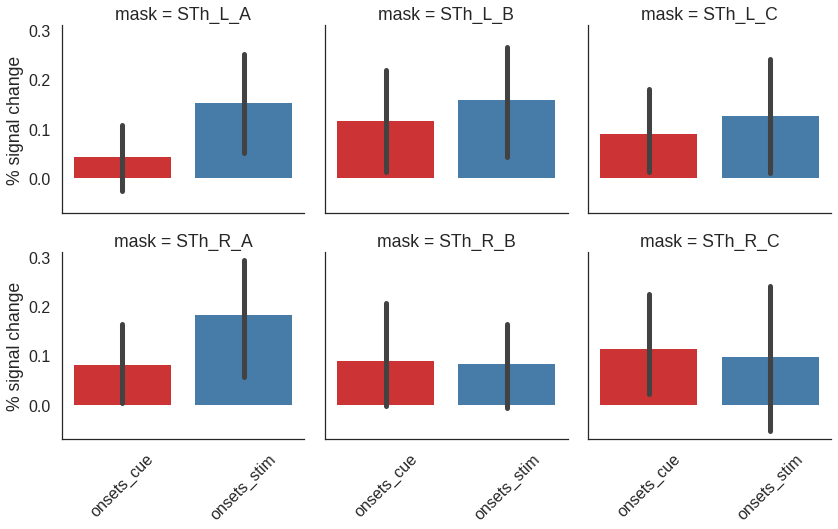

In [16]:
df_glm = pandas.DataFrame(level2_dict)
df_glm = df_glm.query('par != "constant"')
df_glm['dummy'] = 1

df_glm['% signal change'] = df_glm['value']
sns.set_palette('Set1')
sns.set_context('poster')
sns.set_style('white')

# sns.factorplot(x='dummy', y='value', hue='par', data=df_glm, col='mask', col_wrap=3, kind='bar', ci=95, hue_order=['payoff_cue (left)', 'payoff_cue (right)', 'neutral_cue','difficult_rdm', 'easy_rdm'])

tmp = df_glm.groupby(['subject_id', 'mask', 'par', 'dummy'], as_index=False).mean()
fac = sns.factorplot(x='par', y='% signal change', data=tmp, col='mask', col_wrap=3, kind='bar', ci=95)

fac.set_xticklabels(rotation=45)

plt.tight_layout()

fac.set_xlabels('')

plt.savefig('/home/gdholla1/projects/bias/reports/figures/glm_model0.pdf')

## Stimulus

In [17]:
masks = ['STh_L_A', 'STh_L_B', 'STh_L_C', 'STh_R_A', 'STh_R_B', 'STh_R_C']

results = []

for mask in masks:
    df_mask = df_glm[df_glm['mask'] == mask].pivot_table(index='subject_id', values='value', columns='par')

    %R -i df_mask
    %R library(BayesFactor)
    %R bf = ttestBF(df_mask$onsets_stim)
    %R tmp = extractBF(bf)
    %R -o tmp
    
    t, p = sp.stats.ttest_1samp(df_mask['onsets_stim'], 0)
    
    results.append({'mask':mask,
                    'BF':tmp.bf.values[0],
                    't':t,
                    'p':p})
    
np.round(pandas.DataFrame(results)[['mask', 'BF', 't', 'p']], 2).T    
    

,0,1,2,3,4,5
mask,STh_L_A,STh_L_B,STh_L_C,STh_R_A,STh_R_B,STh_R_C
BF,6.23,3.45,1.53,6.25,0.99,0.48
t,2.98,2.65,2.15,2.98,1.86,1.28
p,0.01,0.02,0.05,0.01,0.08,0.22


## Cue

In [18]:

masks = ['STh_L_A', 'STh_L_B', 'STh_L_C', 'STh_R_A', 'STh_R_B', 'STh_R_C']

results = []

for mask in masks:
    df_mask = df_glm[df_glm['mask'] == mask].pivot_table(index='subject_id', values='value', columns='par')

    %R -i df_mask
    %R library(BayesFactor)
    %R bf = ttestBF(df_mask$onsets_cue)
    %R tmp = extractBF(bf)
    %R -o tmp
    
    t, p = sp.stats.ttest_1samp(df_mask['onsets_cue'], 0)
    
    results.append({'mask':mask,
                    'BF':tmp.bf.values[0],
                    't':t,
                    'p':p})
    
np.round(pandas.DataFrame(results)[['mask', 'BF', 't', 'p']], 2).T    
    

,0,1,2,3,4,5
mask,STh_L_A,STh_L_B,STh_L_C,STh_R_A,STh_R_B,STh_R_C
BF,0.44,1.42,1.37,1.07,0.68,1.59
t,1.19,2.1,2.08,1.91,1.58,2.18
p,0.25,0.05,0.05,0.07,0.13,0.04


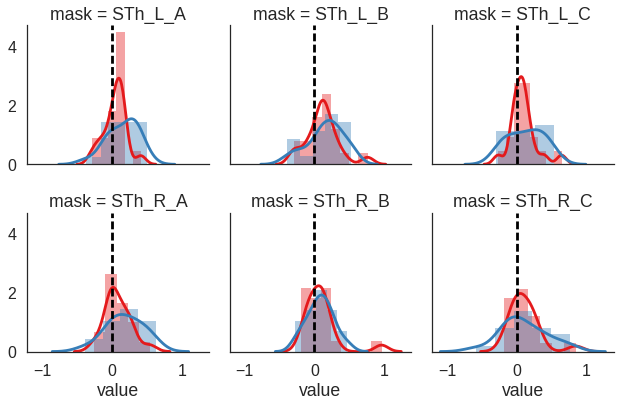

In [19]:
fac = sns.FacetGrid(df_glm.groupby(['subject_id', 'par', 'mask'], as_index=False).mean(), col='mask', col_wrap=3, hue='par')

fac.map(sns.distplot, 'value')
for ax in fac.axes.ravel():
    ax.axvline(0, c='k', ls='--')

In [20]:
tmp = df_glm.pivot_table(index=['mask', 'subject_id'], columns=['par'], values='value').reset_index()
tmp['subject_id'] = tmp['subject_id'].astype('category')

tmp_l = tmp[np.in1d(tmp['mask'], ['STh_L_A', 'STh_L_B', 'STh_L_C'])]
%R -i tmp_l
%R bf = anovaBF(onsets_cue ~ mask + subject_id, data =tmp_l,  whichRandom="subject_id", whichModels='ID', iterations=100000)
%R print(bf)

tmp_l = tmp[np.in1d(tmp['mask'], ['STh_L_A', 'STh_L_B', 'STh_L_C'])]
%R -i tmp_l
%R bf = anovaBF(onsets_stim ~ mask + subject_id, data =tmp_l,  whichRandom="subject_id", iterations=100000)
%R print(bf)

tmp_r = tmp[np.in1d(tmp['mask'], ['STh_R_A', 'STh_R_B', 'STh_R_C'])]
%R -i tmp_r
%R bf = anovaBF(onsets_cue ~ mask + subject_id, data =tmp_r,  whichRandom="subject_id", whichModels='all', iterations=100000)
%R print(bf)

tmp_r = tmp[np.in1d(tmp['mask'], ['STh_R_A', 'STh_R_B', 'STh_R_C'])]
%R -i tmp_r
%R bf = anovaBF(onsets_stim ~ mask + subject_id, data =tmp_r,  whichRandom="subject_id", whichModels='all', iterations=100000)
%R print(bf)

/usr/local/lib/python2.7/dist-packages/rpy2/robjects/pandas2ri.py:57: UserWarning: Error while trying to convert the column "subject_id". Fall back to string conversion. The error is: Converting pandas "Category" series to R factor is only possible when categories are strings.
  (name, str(e)))


  |======================================================================| 100%


Bayes factor analysis
--------------
[1] mask + subject_id : 0.4398343 ±0.32%

Against denominator:
  onsets_cue ~ subject_id 
---
Bayes factor type: BFlinearModel, JZS



  |======================================================================| 100%


Bayes factor analysis
--------------
[1] mask + subject_id : 0.1628657 ±0.58%

Against denominator:
  onsets_stim ~ subject_id 
---
Bayes factor type: BFlinearModel, JZS



  |======================================================================| 100%


Bayes factor analysis
--------------
[1] mask + subject_id : 0.1941809 ±0.37%

Against denominator:
  onsets_cue ~ subject_id 
---
Bayes factor type: BFlinearModel, JZS



  |======================================================================| 100%


Bayes factor analysis
--------------
[1] mask + subject_id : 0.5141639 ±0.28%

Against denominator:
  onsets_stim ~ subject_id 
---
Bayes factor type: BFlinearModel, JZS



In [554]:
tmp_l = tmp_l.pivot_table(index='subject_id')

%R -i tmp_l
%R bf = ttestBF(tmp_l$onsets_cue)
%R print(bf)
%R bf = ttestBF(tmp_l$onsets_stim)
%R print(bf)

Bayes factor analysis
--------------
[1] Alt., r=0.707 : 1.144898 ±0%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS



Bayes factor analysis
--------------
[1] Alt., r=0.707 : 712.9012 ±0%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS



In [555]:
tmp_r = tmp_r.pivot_table(index='subject_id')

%R -i tmp_r
%R bf = ttestBF(tmp_r$onsets_cue)
%R print(bf)
%R bf = ttestBF(tmp_r$onsets_stim)
%R print(bf)

Bayes factor analysis
--------------
[1] Alt., r=0.707 : 0.4092498 ±0.01%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS



Bayes factor analysis
--------------
[1] Alt., r=0.707 : 262.0966 ±0%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS

